1. Correct Non-Uniform Illumination
•	Why first? Uneven lighting affects the contrast and intensity distribution, which can make later noise and blur removal less effective. Applying histogram equalization, adaptive contrast enhancement, or Contrast Limited Adaptive Histogram Equalization first ensures that noise and edges are more uniformly distributed.

Correct Non-Uniform Illumination – Since you used different light sources (daylight and artificial light), there may be intensity variations. Applying adaptive histogram equalization or homomorphic filtering will help normalize brightness across frames


Applying histogram_equalization,adaptive_histogram_equalization,clahe_equalization to sample image

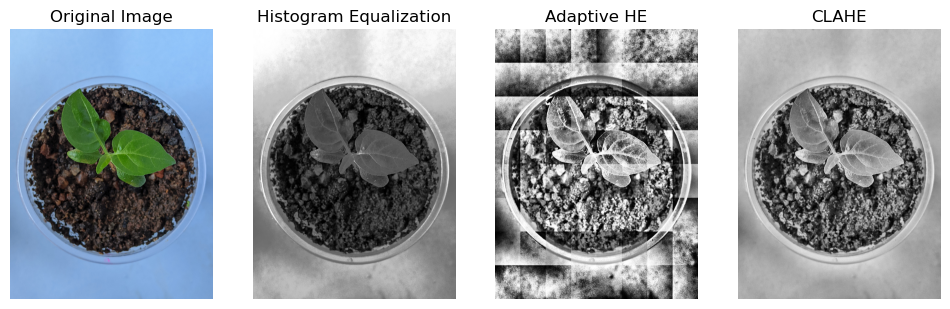

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(img):
    """Apply Global Histogram Equalization"""
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(img_gray)
    return equalized

def adaptive_histogram_equalization(img):
    """Apply Adaptive Histogram Equalization (AHE)"""
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grid_size = 8  # Define grid size for AHE
    h, w = img_gray.shape
    new_img = np.zeros_like(img_gray)
    step_x, step_y = w // grid_size, h // grid_size
    
    for i in range(0, w, step_x):
        for j in range(0, h, step_y):
            roi = img_gray[j:j+step_y, i:i+step_x]
            new_img[j:j+step_y, i:i+step_x] = cv2.equalizeHist(roi)
    
    return new_img

def clahe_equalization(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    """Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)"""
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_img = clahe.apply(img_gray)
    return clahe_img

def compare_methods(image_path):
    """Compare different illumination correction methods"""
    img = cv2.imread(image_path)
    
    he_img = histogram_equalization(img)
    ahe_img = adaptive_histogram_equalization(img)
    clahe_img = clahe_equalization(img)
    

    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 4, 2)
    plt.imshow(he_img, cmap='gray')
    plt.title("Histogram Equalization")
    plt.axis("off")
    
    plt.subplot(1, 4, 3)
    plt.imshow(ahe_img, cmap='gray')
    plt.title("Adaptive HE")
    plt.axis("off")
    
    plt.subplot(1, 4, 4)
    plt.imshow(clahe_img, cmap='gray')
    plt.title("CLAHE")
    plt.axis("off")
    
    plt.show()

    
compare_methods('img/plant_image_3.jpg')

To segemant plant we need G channe of RGB image so ,to Eqalized HE without affcting to Green channle we need to separatly apply HE to only inensity levels/ brightness
spilting RGB image from Lab or Ycrcb color space and apply HE to only L or Y channel

OpenCV provides a wide range of color space conversions, allowing you to work with images in various representations. Here's a breakdown of some of the most commonly used color spaces:
Fundamental Color Spaces:
•	BGR (Blue, Green, Red): 
o	This is OpenCV's default color space. Images are loaded and displayed in this format.
•	RGB (Red, Green, Blue): 
o	The standard color space used in many other applications and displays. Often you will have to convert from BGR to RGB, and back.
Other Important Color Spaces:
•	Grayscale: 
o	A single-channel representation of an image, where each pixel represents its intensity.
•	HSV (Hue, Saturation, Value): 
o	Useful for color-based segmentation and object tracking.
o	Hue: The color type.
o	Saturation: The color's intensity.
o	Value: The color's brightness.
•	HLS (Hue, Lightness, Saturation): 
o	Similar to HSV, but uses Lightness instead of Value.
•	YCrCb: 
o	Commonly used in video compression and digital television.
o	Y: Luma (brightness).
o	Cr: Red difference.
o	Cb: Blue difference.
•	LAB (CIELAB): 
o	Designed to be perceptually uniform, making it useful for measuring color differences.
o	L: lightness.
o	A: green to red.
o	B: blue to yellow.
•	XYZ: 
o	CIEXYZ is a color space defined by the International Commission on Illumination (CIE). It is used as a basis for other color spaces.
Key Considerations:
•	OpenCV's cv2.cvtColor() function is used to convert images between different color spaces.
•	Each color space has its own advantages and disadvantages, depending on the specific application.


First we apply HE to image wich splited by LAB color space

How This Works:
1.	LAB color space is used since the L-channel represents brightness, allowing corrections without affecting colors.
2.	The selected method (HE, AHE, or CLAHE) modifies only the L-channel.
3.	The corrected L-channel is merged back with A and B channels to retain colors.
4.	The final image has improved illumination without losing colors


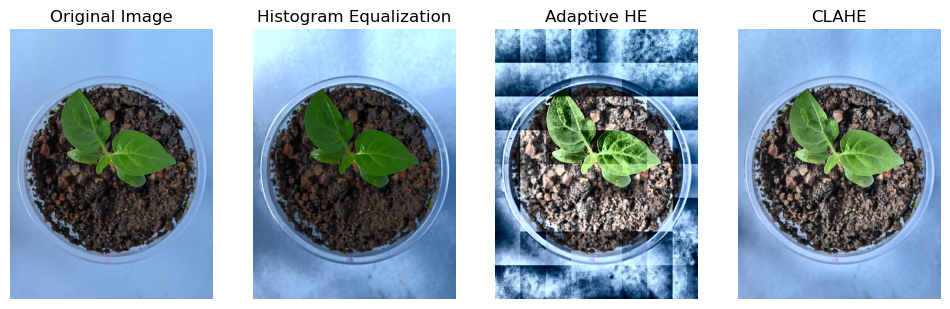

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_correction_to_l_channel(img, method='clahe'):
    """Apply illumination correction to the L-channel in LAB color space"""
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # Convert to LAB
    l, a, b = cv2.split(lab)  # Split channels
    
    if method == 'he':
        l_corrected = cv2.equalizeHist(l)  # Histogram Equalization
    elif method == 'ahe':
        grid_size = 8  # Define grid size for AHE
        h, w = l.shape
        new_l = np.zeros_like(l)
        step_x, step_y = w // grid_size, h // grid_size
        
        for i in range(0, w, step_x):
            for j in range(0, h, step_y):
                roi = l[j:j+step_y, i:i+step_x]
                new_l[j:j+step_y, i:i+step_x] = cv2.equalizeHist(roi)
        l_corrected = new_l
    else:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # CLAHE
        l_corrected = clahe.apply(l)
    
    corrected_lab = cv2.merge((l_corrected, a, b))  # Merge corrected L-channel
    corrected_img = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2BGR)  # Convert back to BGR
    
    return corrected_img

def compare_methods(image_path):
    """Compare different illumination correction methods while preserving colors"""
    img = cv2.imread(image_path)
    
    he_img = apply_correction_to_l_channel(img, method='he')
    ahe_img = apply_correction_to_l_channel(img, method='ahe')
    clahe_img = apply_correction_to_l_channel(img, method='clahe')
    
    from cv2 import imwrite
    imwrite("img/3_reducing_fixing_non-uniform illumination_HE_LAB_img.jpg",he_img)
    imwrite("img/3_reducing_fixing_non-uniform illumination_AHE_LAB_img.jpg",ahe_img)
    imwrite("img/3_reducing_fixing_non-uniform illumination_CLAHE_LAB_img.jpg",clahe_img)
    
    
    from cv2 import imwrite
    imwrite("output_clash_img3.jpg",clahe_img)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(he_img, cv2.COLOR_BGR2RGB))
    plt.title("Histogram Equalization")
    plt.axis("off")
    
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(ahe_img, cv2.COLOR_BGR2RGB))
    plt.title("Adaptive HE")
    plt.axis("off")
    
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))
    plt.title("CLAHE")
    plt.axis("off")
    
    plt.show()

compare_methods('img/plant_image_3.jpg')


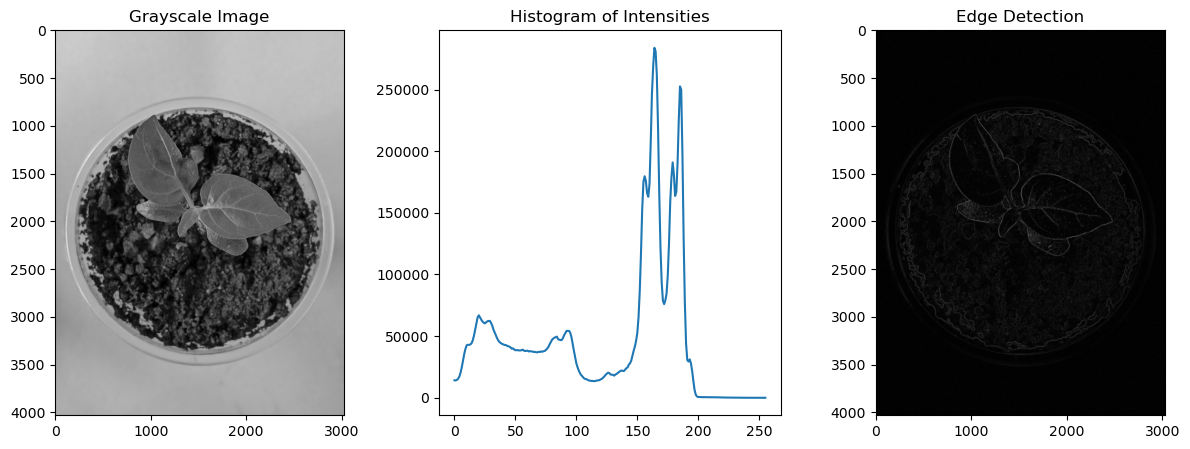

Region 1: Mean=136.15, Std Dev=58.10
Region 2: Mean=137.75, Std Dev=58.19
Region 3: Mean=108.82, Std Dev=61.28
Region 4: Mean=112.60, Std Dev=54.90


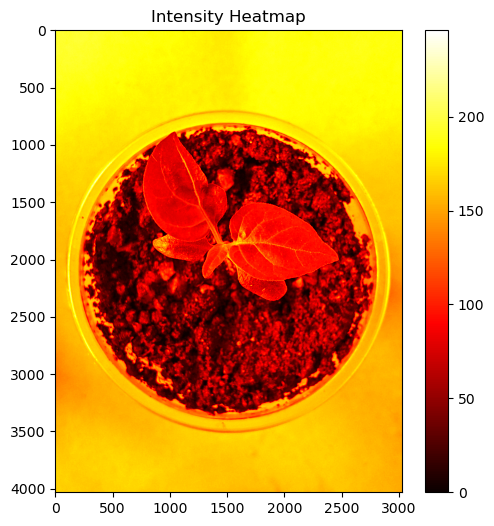

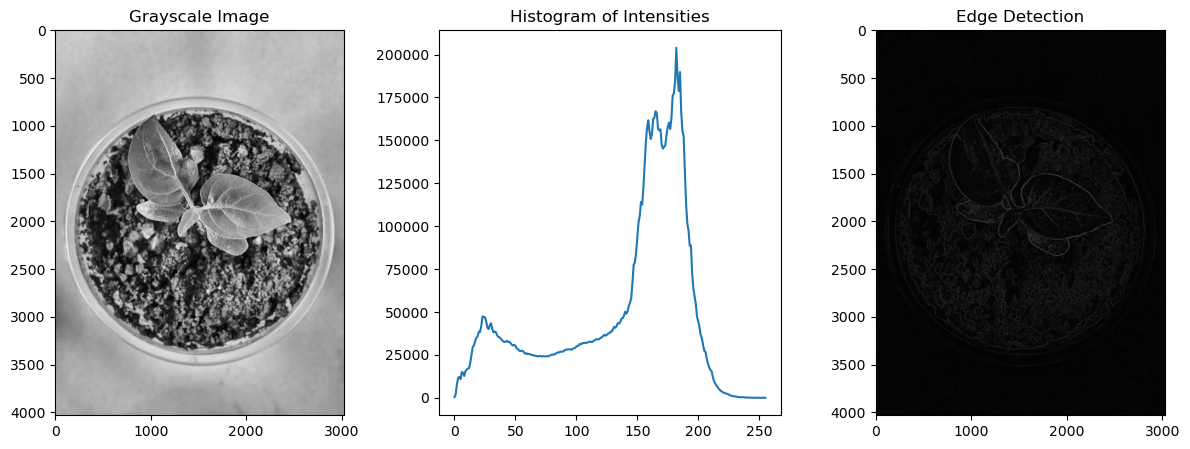

Region 1: Mean=146.32, Std Dev=52.30
Region 2: Mean=149.78, Std Dev=51.63
Region 3: Mean=125.59, Std Dev=57.93
Region 4: Mean=132.50, Std Dev=51.59


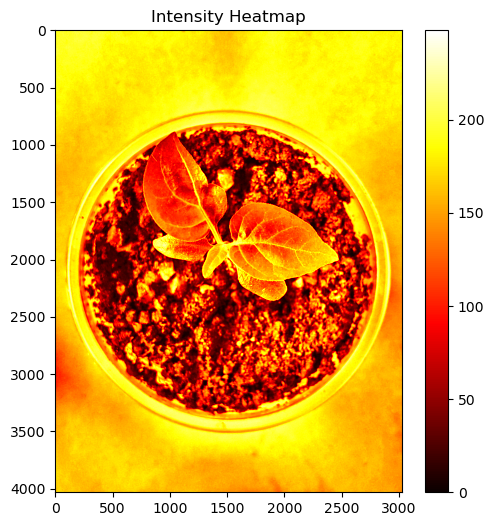

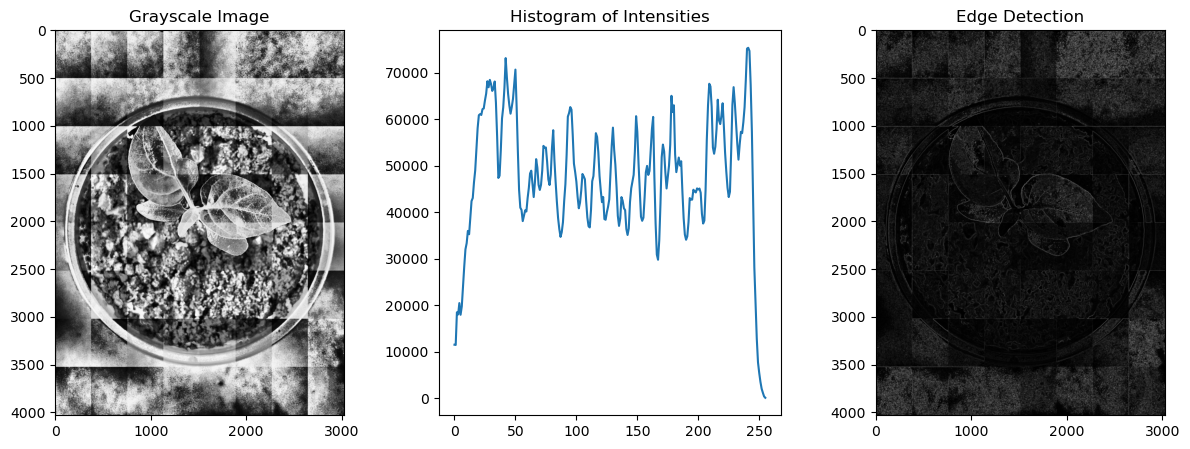

Region 1: Mean=125.73, Std Dev=72.47
Region 2: Mean=126.01, Std Dev=72.56
Region 3: Mean=126.77, Std Dev=72.39
Region 4: Mean=126.34, Std Dev=72.00


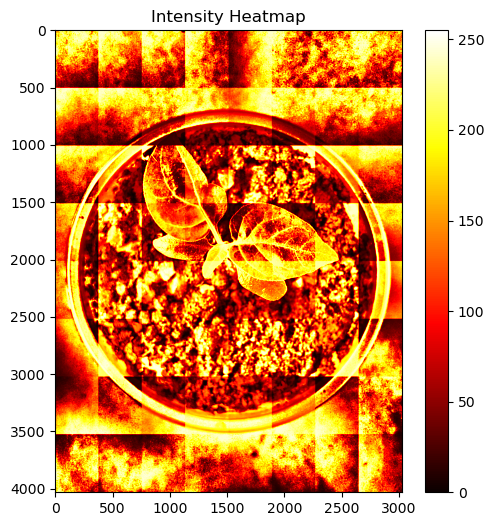

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_illumination(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    
    # Compute mean and standard deviation in different regions
    h, w = img.shape
    regions = [img[:h//2, :w//2], img[:h//2, w//2:], img[h//2:, :w//2], img[h//2:, w//2:]]
    stats = [(np.mean(region), np.std(region)) for region in regions]
    
    # Edge detection using Sobel
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edges = np.hypot(sobelx, sobely)
    
    # Show results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Grayscale Image")
    
    ax[1].plot(hist)
    ax[1].set_title("Histogram of Intensities")
    
    ax[2].imshow(edges, cmap='gray')
    ax[2].set_title("Edge Detection")
    
    plt.show()
    
    # Print statistics
    for i, (mean, std) in enumerate(stats):
        print(f"Region {i+1}: Mean={mean:.2f}, Std Dev={std:.2f}")
    
    # Heatmap visualization
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='hot')
    plt.colorbar()
    plt.title("Intensity Heatmap")
    plt.show()


analyze_illumination("img/plant_image_3.jpg")
analyze_illumination("img/3_reducing_fixing_non-uniform illumination_CLAHE_LAB_img.jpg")
analyze_illumination("img/3_reducing_fixing_non-uniform illumination_AHE_LAB_img.jpg")
analyze_illumination("img/3_reducing_fixing_non-uniform illumination_HE_LAB_img.jpg")


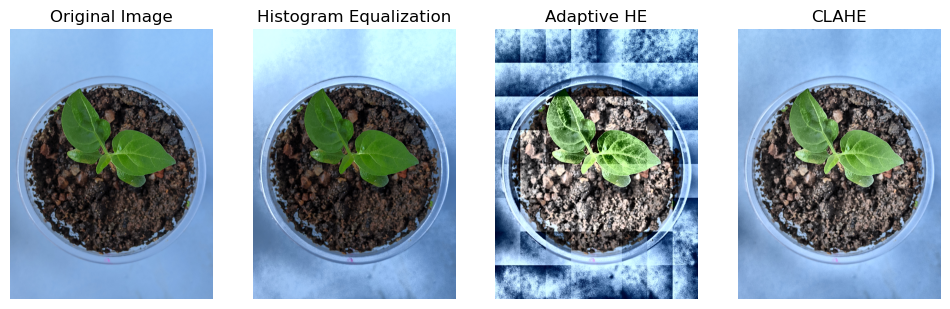

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_correction_to_y_channel(img, method='clahe'):
    """Apply illumination correction to the Y-channel in YCrCb color space"""
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)  # Convert to YCrCb
    y, cr, cb = cv2.split(ycrcb)  # Split channels
    
    if method == 'he':
        y_corrected = cv2.equalizeHist(y)  # Histogram Equalization
    elif method == 'ahe':
        grid_size = 8  # Define grid size for AHE
        h, w = y.shape
        new_y = np.zeros_like(y)
        step_x, step_y = w // grid_size, h // grid_size
        
        for i in range(0, w, step_x):
            for j in range(0, h, step_y):
                roi = y[j:j+step_y, i:i+step_x]
                new_y[j:j+step_y, i:i+step_x] = cv2.equalizeHist(roi)
        y_corrected = new_y
    else:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # CLAHE
        y_corrected = clahe.apply(y)
    
    corrected_ycrcb = cv2.merge((y_corrected, cr, cb))  # Merge corrected Y-channel
    corrected_img = cv2.cvtColor(corrected_ycrcb, cv2.COLOR_YCrCb2BGR)  # Convert back to BGR
    
    return corrected_img

def compare_methods(image_path):
    """Compare different illumination correction methods while preserving colors"""
    img = cv2.imread(image_path)
    
    he_img = apply_correction_to_y_channel(img, method='he')
    ahe_img = apply_correction_to_y_channel(img, method='ahe')
    clahe_img = apply_correction_to_y_channel(img, method='clahe')
    
    from cv2 import imwrite
    imwrite("img/3_reducing_fixing_non-uniform illumination_HE_YCrCb_img.jpg",he_img)
    imwrite("img/3_reducing_fixing_non-uniform illumination_AHE_YCrCb_img.jpg",ahe_img)
    imwrite("img/3_reducing_fixing_non-uniform illumination_CLAHE_YCrCb_img.jpg",clahe_img)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(he_img, cv2.COLOR_BGR2RGB))
    plt.title("Histogram Equalization")
    plt.axis("off")
    
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(ahe_img, cv2.COLOR_BGR2RGB))
    plt.title("Adaptive HE")
    plt.axis("off")
    
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))
    plt.title("CLAHE")
    plt.axis("off")
    
    plt.show()

compare_methods('img/plant_image_3.jpg')



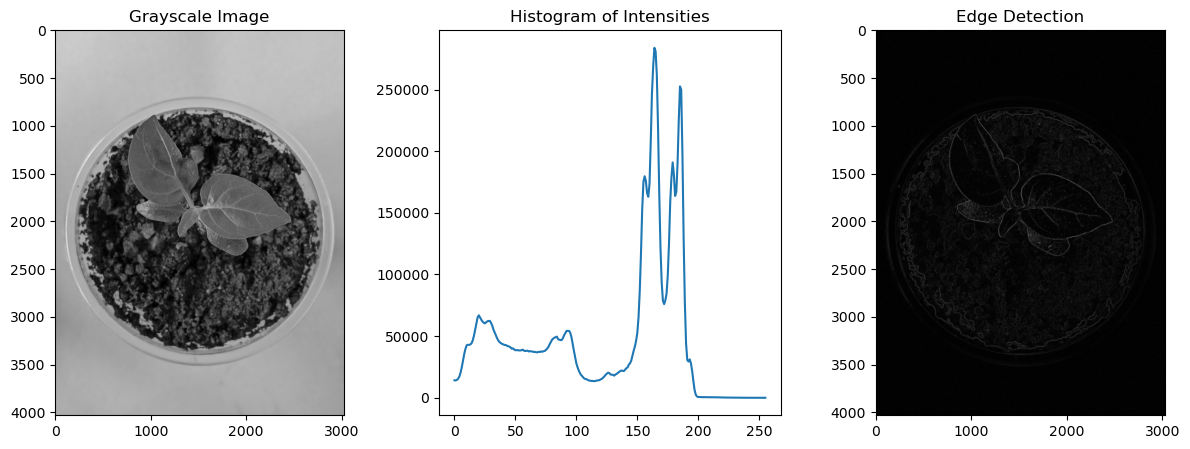

Region 1: Mean=136.15, Std Dev=58.10
Region 2: Mean=137.75, Std Dev=58.19
Region 3: Mean=108.82, Std Dev=61.28
Region 4: Mean=112.60, Std Dev=54.90


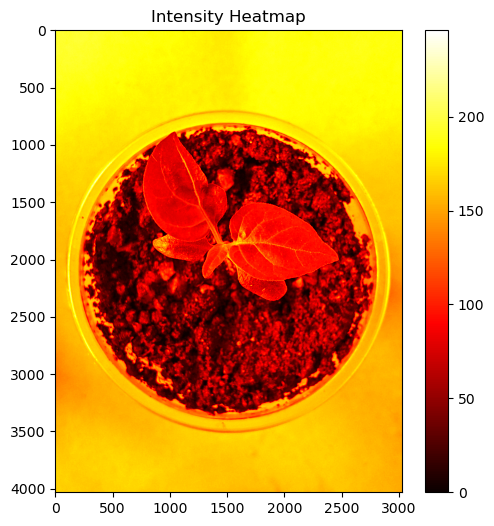

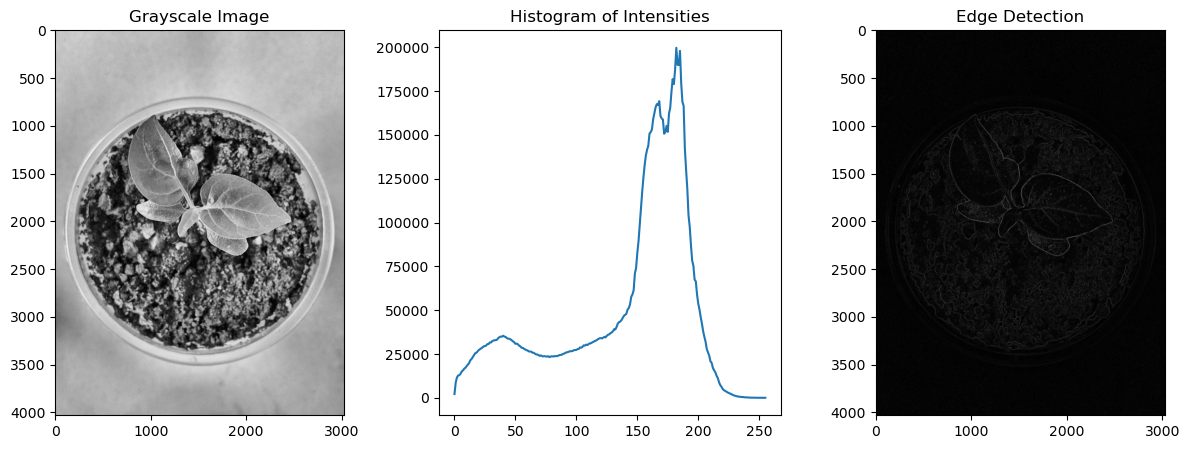

Region 1: Mean=149.72, Std Dev=51.09
Region 2: Mean=152.84, Std Dev=50.79
Region 3: Mean=129.45, Std Dev=56.75
Region 4: Mean=135.38, Std Dev=51.69


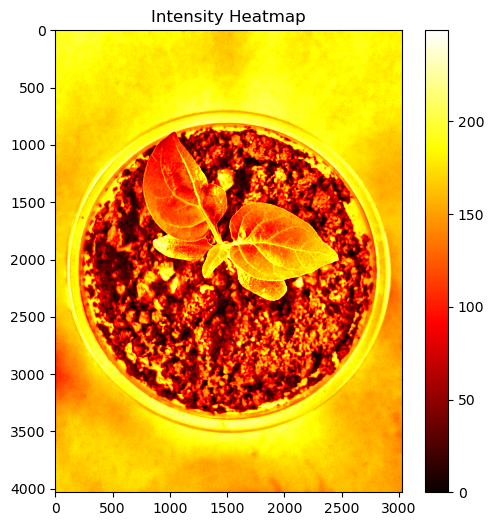

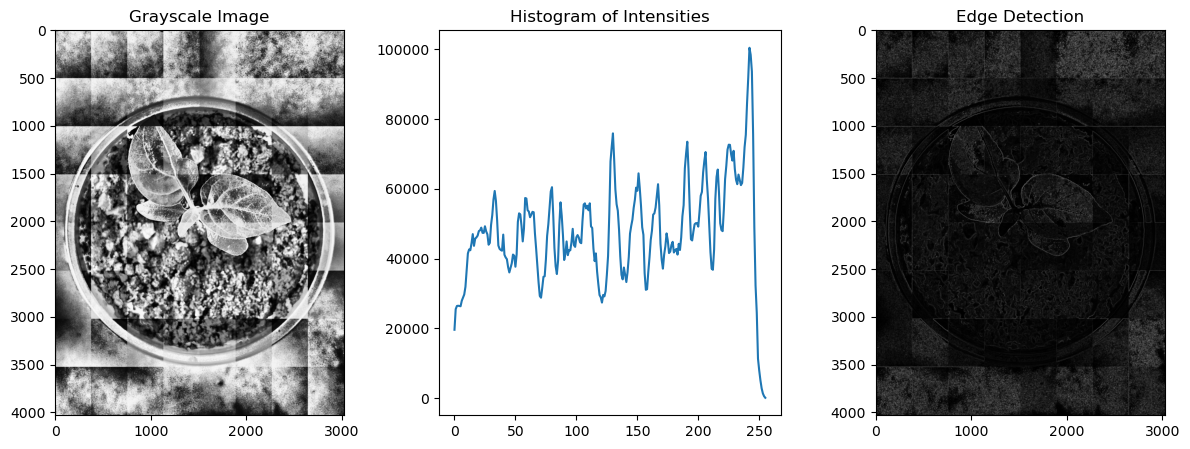

Region 1: Mean=134.22, Std Dev=72.90
Region 2: Mean=135.09, Std Dev=72.82
Region 3: Mean=133.07, Std Dev=73.05
Region 4: Mean=133.20, Std Dev=73.17


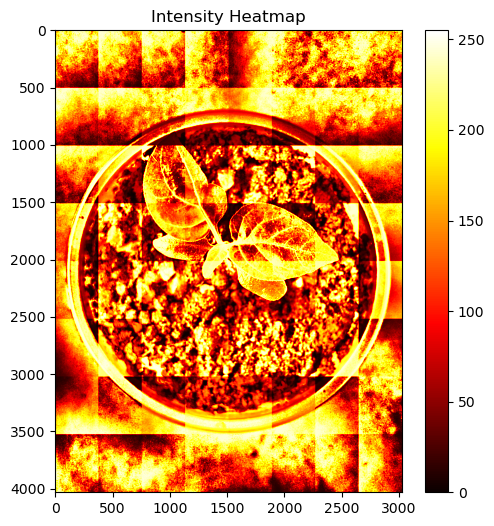

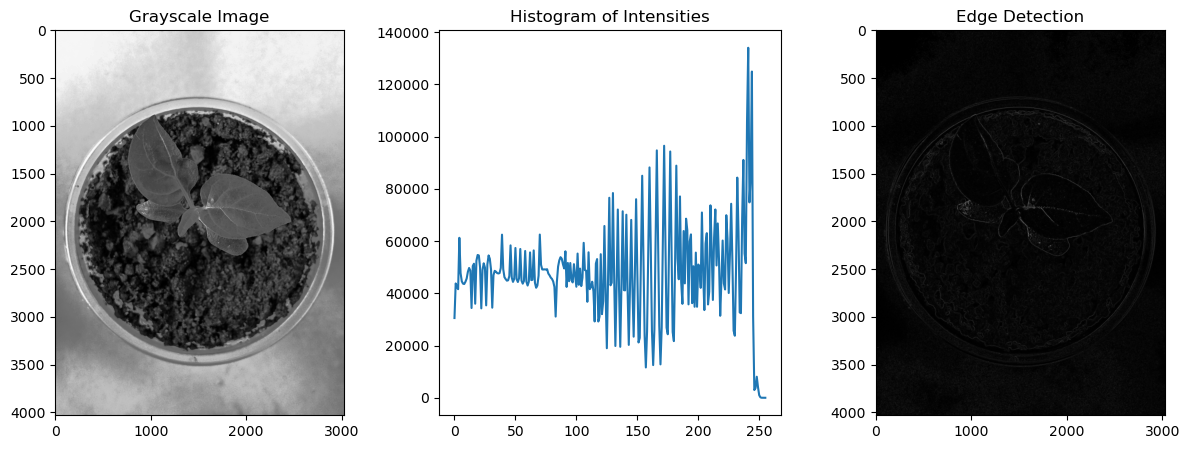

Region 1: Mean=151.66, Std Dev=77.10
Region 2: Mean=155.23, Std Dev=78.66
Region 3: Mean=101.54, Std Dev=61.30
Region 4: Mean=102.62, Std Dev=52.87


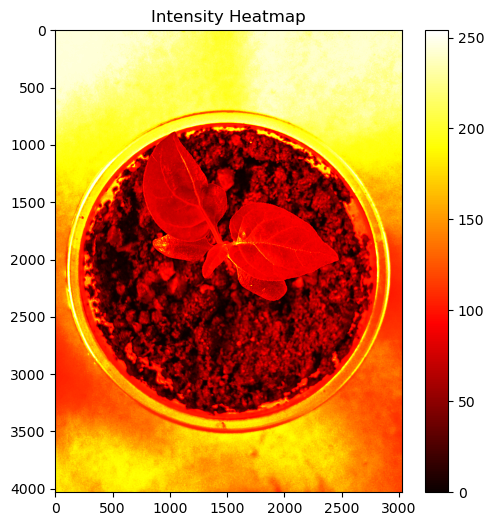

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_illumination(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    
    # Compute mean and standard deviation in different regions
    h, w = img.shape
    regions = [img[:h//2, :w//2], img[:h//2, w//2:], img[h//2:, :w//2], img[h//2:, w//2:]]
    stats = [(np.mean(region), np.std(region)) for region in regions]
    
    # Edge detection using Sobel
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edges = np.hypot(sobelx, sobely)
    
    # Show results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Grayscale Image")
    
    ax[1].plot(hist)
    ax[1].set_title("Histogram of Intensities")
    
    ax[2].imshow(edges, cmap='gray')
    ax[2].set_title("Edge Detection")
    
    plt.show()
    
    # Print statistics
    for i, (mean, std) in enumerate(stats):
        print(f"Region {i+1}: Mean={mean:.2f}, Std Dev={std:.2f}")
    
    # Heatmap visualization
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='hot')
    plt.colorbar()
    plt.title("Intensity Heatmap")
    plt.show()


analyze_illumination("img/plant_image_3.jpg")
analyze_illumination("img/3_reducing_fixing_non-uniform illumination_CLAHE_YCrCB_img.jpg")
analyze_illumination("img/3_reducing_fixing_non-uniform illumination_AHE_YCrCB_img.jpg")
analyze_illumination("img/3_reducing_fixing_non-uniform illumination_HE_YCrCB_img.jpg")



#### Looking at above comparison we can desided CALHE in YCrCB coor space is best at reducing/fixing non-uniform illumination

### Contrast Limited Adaptive Histogram Equalization (CLAHE) 

When you use cv2.createCLAHE(), you're creating a Contrast Limited Adaptive Histogram Equalization object. Here's a breakdown of the key properties:
•	clipLimit:
o	This parameter sets the threshold for contrast limiting.
o	It controls the degree of contrast enhancement. Higher values result in stronger contrast.
o	Essentially, it limits the amplification of contrast in homogeneous areas of the image, which helps to reduce noise amplification.
o	In the code example clipLimit=2.0 means that the contrast will be limited to a factor of 2.0.

•	tileGridSize:
o	This parameter defines the size of the grid tiles that the image is divided into.
o	CLAHE works by applying histogram equalization to small regions of the image (tiles) rather than the entire image at once.
o	This adaptive approach helps to improve local contrast.
o	tileGridSize=(8, 8) means that the image will be divided into tiles of 8x8 pixels.
o	By dividing the image into tiles, CLAHE can adapt to variations in illumination across different parts of the image.

In essence:
•	clipLimit prevents excessive contrast enhancement, which can lead to noise.
•	tileGridSize allows for local contrast adjustment, which is particularly useful for images with uneven illumination.
These properties allow you to fine-tune the CLAHE algorithm to achieve the desired level of contrast enhancement while minimizing unwanted artifacts.



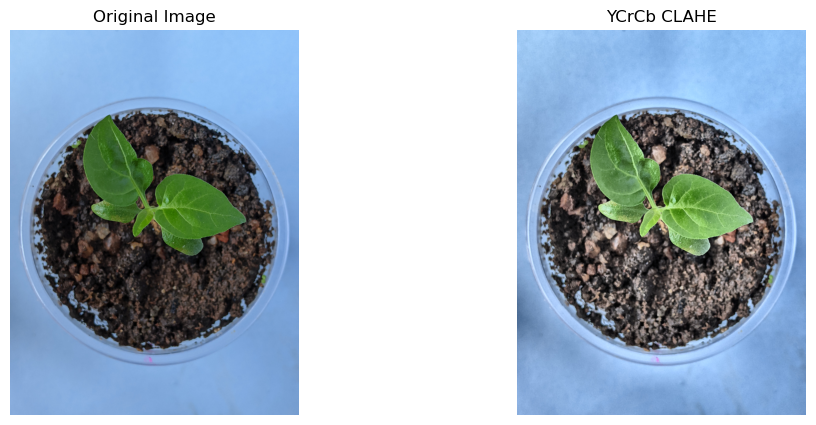

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_correction_to_y_channel(img):
    """Apply illumination correction to the Y-channel in YCrCb color space"""
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)  # Convert to YCrCb
    y, cr, cb = cv2.split(ycrcb)  # Split channels
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # CLAHE
    y_corrected = clahe.apply(y)
    
    corrected_ycrcb = cv2.merge((y_corrected, cr, cb))  # Merge corrected Y-channel
    corrected_img = cv2.cvtColor(corrected_ycrcb, cv2.COLOR_YCrCb2BGR)  # Convert back to BGR
    
    return corrected_img

def compare_methods(image_path):
    """Compare original and CLAHE corrected images."""
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return
    
    clahe_img = apply_correction_to_y_channel(img)
    from cv2 import imwrite
    imwrite("img/3_reducing_fixing_non-uniform illumination_CLAHE_YCrCb_img_2.0_8.jpg",clahe_img)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1) #adjusted to show only two images.
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2) #adjusted to show only two images.
    plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))
    plt.title("YCrCb CLAHE")
    plt.axis("off")
    
    plt.show()

# Example usage
compare_methods('img/plant_image_3.jpg')

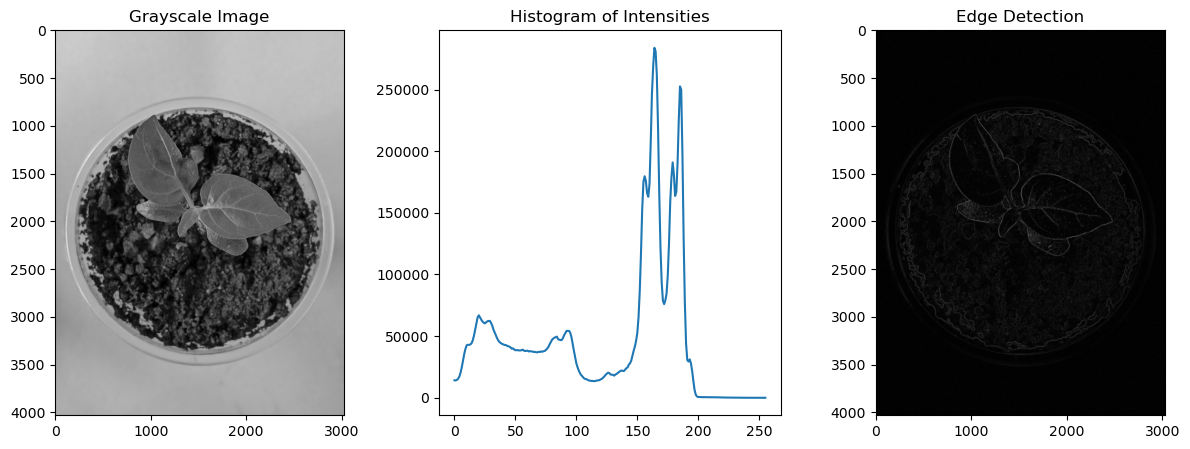

Region 1: Mean=136.15, Std Dev=58.10
Region 2: Mean=137.75, Std Dev=58.19
Region 3: Mean=108.82, Std Dev=61.28
Region 4: Mean=112.60, Std Dev=54.90


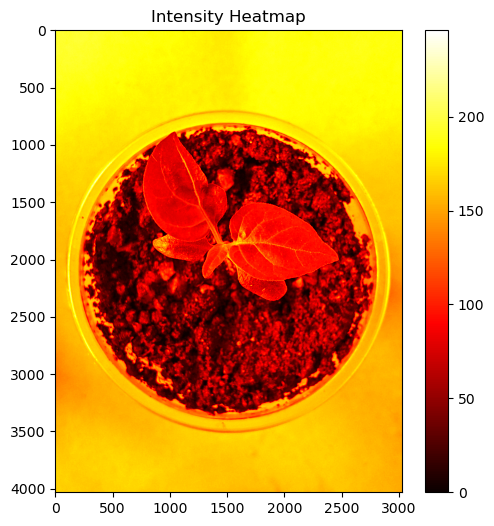

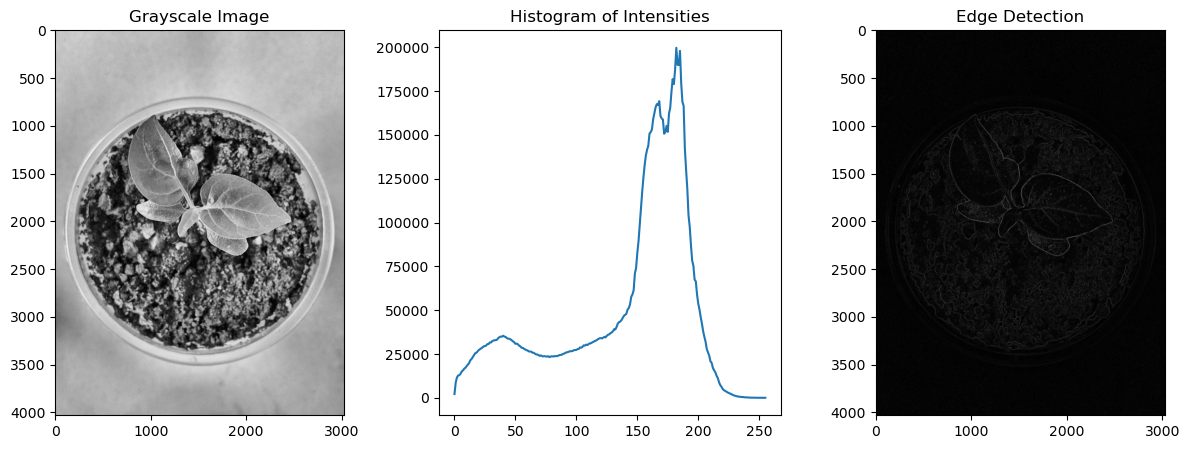

Region 1: Mean=149.72, Std Dev=51.09
Region 2: Mean=152.84, Std Dev=50.79
Region 3: Mean=129.45, Std Dev=56.75
Region 4: Mean=135.38, Std Dev=51.69


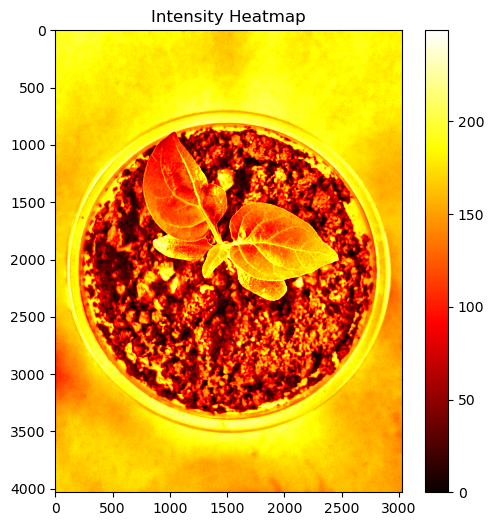

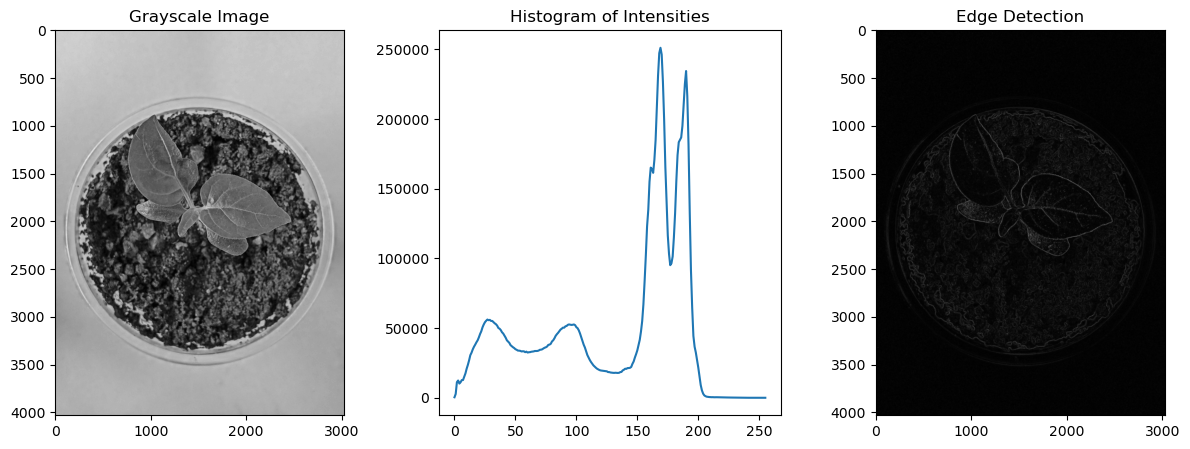

Region 1: Mean=142.61, Std Dev=57.01
Region 2: Mean=144.68, Std Dev=56.78
Region 3: Mean=116.75, Std Dev=59.97
Region 4: Mean=120.36, Std Dev=53.67


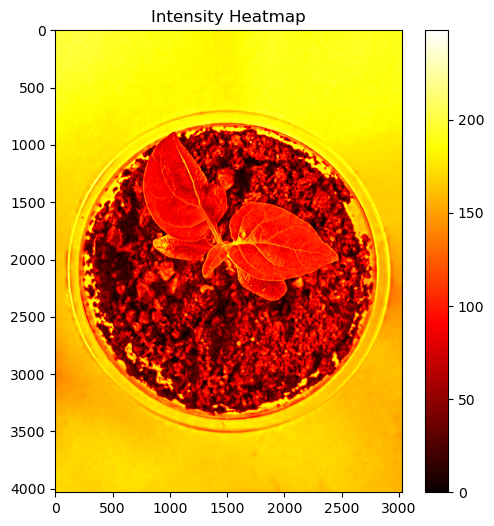

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_illumination(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    
    # Compute mean and standard deviation in different regions
    h, w = img.shape
    regions = [img[:h//2, :w//2], img[:h//2, w//2:], img[h//2:, :w//2], img[h//2:, w//2:]]
    stats = [(np.mean(region), np.std(region)) for region in regions]
    
    # Edge detection using Sobel
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edges = np.hypot(sobelx, sobely)
    
    # Show results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Grayscale Image")
    
    ax[1].plot(hist)
    ax[1].set_title("Histogram of Intensities")
    
    ax[2].imshow(edges, cmap='gray')
    ax[2].set_title("Edge Detection")
    
    plt.show()
    
    # Print statistics
    for i, (mean, std) in enumerate(stats):
        print(f"Region {i+1}: Mean={mean:.2f}, Std Dev={std:.2f}")
    
    # Heatmap visualization
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='hot')
    plt.colorbar()
    plt.title("Intensity Heatmap")
    plt.show()

analyze_illumination("img/plant_image_3.jpg")
# gride size 8 clip limit 2.0
analyze_illumination("img/3_reducing_fixing_non-uniform illumination_CLAHE_YCrCb_img_2.0_8.jpg")
# gride size 100 clip limit 0.75
analyze_illumination("img/3_reducing_fixing_non-uniform illumination_CLAHE_YCrCb_img_075_100.jpg")



incresing tileGridSize we can change how it effect to image
we can see there is better results at gride size  20 but visual comparisan is not good